#Getting the libraries

In [ ]:
!pip install pennylane
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

#Single Qubit Teleportation

**Defining the State Ψ**

In [ ]:
# Toy Example
alpha = 0+0.5j
beta = -np.sqrt(3)*0.5 + 0j
ket_0=np.array([1,0])
ket_1=np.array([0,1])
ket_0=np.transpose(ket_0)
ket_1=np.transpose(ket_1)
psi=alpha*ket_0 + beta*ket_1

**Entanglement Circuit**



(<Figure size 500x300 with 1 Axes>, <Axes: >)

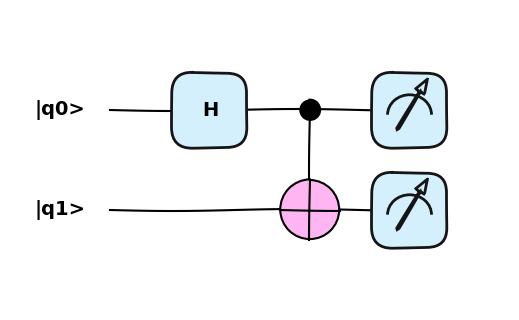

In [ ]:
wires=['|q0>','|q1>']
deve = qml.device("default.qubit",wires = wires)
def entanglement(state) :
  qml.Hadamard(wires='|q0>')
  qml.CNOT(wires=['|q0>','|q1>'])
  return qml.density_matrix(wires)
circuit_entangled = qml.QNode(entanglement , deve)
qml.draw_mpl(circuit_entangled,style="pennylane")(ket_0)

**Code**

In [ ]:
wires = ["A1","A2","B"]
dev = qml.device("default.qubit", wires= wires)
def state_preparation(state):
  qml.StatePrep(state, wires="A1")

@qml.qnode(dev)

def teleport(state):
  state_preparation(state)
  qml.Hadamard("A2")
  qml.CNOT(wires=["A2","B"])
  qml.CNOT(wires=["A1","A2"])
  qml.Hadamard("A1")
  m0 = qml.measure("A1")
  m1 = qml.measure("A2")
  qml.cond(m1, qml.PauliX)("B")
  qml.cond(m0, qml.PauliZ)("B")
  return qml.density_matrix(wires="B")

print("\n **********   Original density matrix at A1 :   **********\n")
print(qml.math.dm_from_state_vector(psi))
print("\n **********   Density matrix after teleportation at B :   ********** \n")
print(teleport(psi))


 **********   Original density matrix at A1 :   **********

[[0.25+0.j        0.  -0.4330127j]
 [0.  +0.4330127j 0.75+0.j       ]]

 **********   Density matrix after teleportation at B :   ********** 

[[0.25+0.j        0.  -0.4330127j]
 [0.  +0.4330127j 0.75+0.j       ]]


**Circuit Visualisation**

(<Figure size 800x400 with 1 Axes>, <Axes: >)

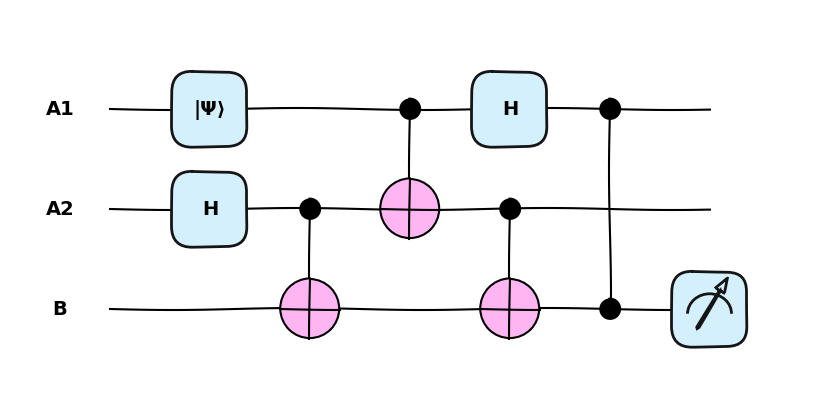

In [ ]:
circuit = qml.QNode(teleport, dev)
qml.draw_mpl(circuit,style="pennylane")(psi)

#2 Qubits Teleportation

**Defining the state Ψ**

Here Ψ is a 2 qubit state

In [ ]:
# Toy Example
ket_00 = np.array([1,0,0,0])
ket_01 = np.array([0,1,0,0])
ket_10 = np.array([0,0,1,0])
ket_11 = np.array([0,0,0,1])
a=1/np.sqrt(4)
psi_12 = a*(ket_00 + ket_01 + ket_10 - ket_11)
psi_12=np.transpose(psi_12)


**Code**

In [ ]:
wires = ["a","b","1","2","3","4","5"]
dev = qml.device("default.qubit", wires= wires)
def state_preparation(state):
  qml.StatePrep(state, wires=["a","b"])
@qml.qnode(dev)

def teleportation_2_qubits(state):
  state_preparation(state)
  qml.Hadamard("1")
  qml.CNOT(wires=["1","3"])
  qml.CNOT(wires=["1","4"])
  qml.CNOT(wires=["1","5"])
  qml.CNOT(wires=["3","1"])
  qml.Hadamard("1")
  qml.CNOT(wires=["1","2"])
  qml.CNOT(wires=["1","4"])
  qml.CNOT(wires=["a","1"])
  qml.CNOT(wires=["b","3"])
  qml.Hadamard("a")
  qml.Hadamard("b")
  qml.CNOT(wires=["1","2"])
  qml.CNOT(wires=["3","5"])
  qml.CZ(wires=["a","2"])
  qml.CNOT(wires=["3","4"])
  qml.CZ(wires=["b","5"])
  qml.CNOT(wires=["1","4"])
  qml.Hadamard("4")
  qml.CZ(wires=["4","2"])
  qml.CZ(wires=["4","5"])
  return qml.density_matrix(wires=["2","5"])


print("\n **********   Original density matrix at Alice :   **********\n")
print(qml.math.dm_from_state_vector(psi_12))
print("\n **********   Density matrix after teleportation at Bob  :   ********** \n")
print(teleportation_2_qubits(psi_12))


 **********   Original density matrix at Alice :   **********

[[ 0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [-0.25+0.j -0.25+0.j -0.25+0.j  0.25+0.j]]

 **********   Density matrix after teleportation at Bob  :   ********** 

[[ 0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [-0.25+0.j -0.25+0.j -0.25+0.j  0.25+0.j]]


**Circuit Visualisation**

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

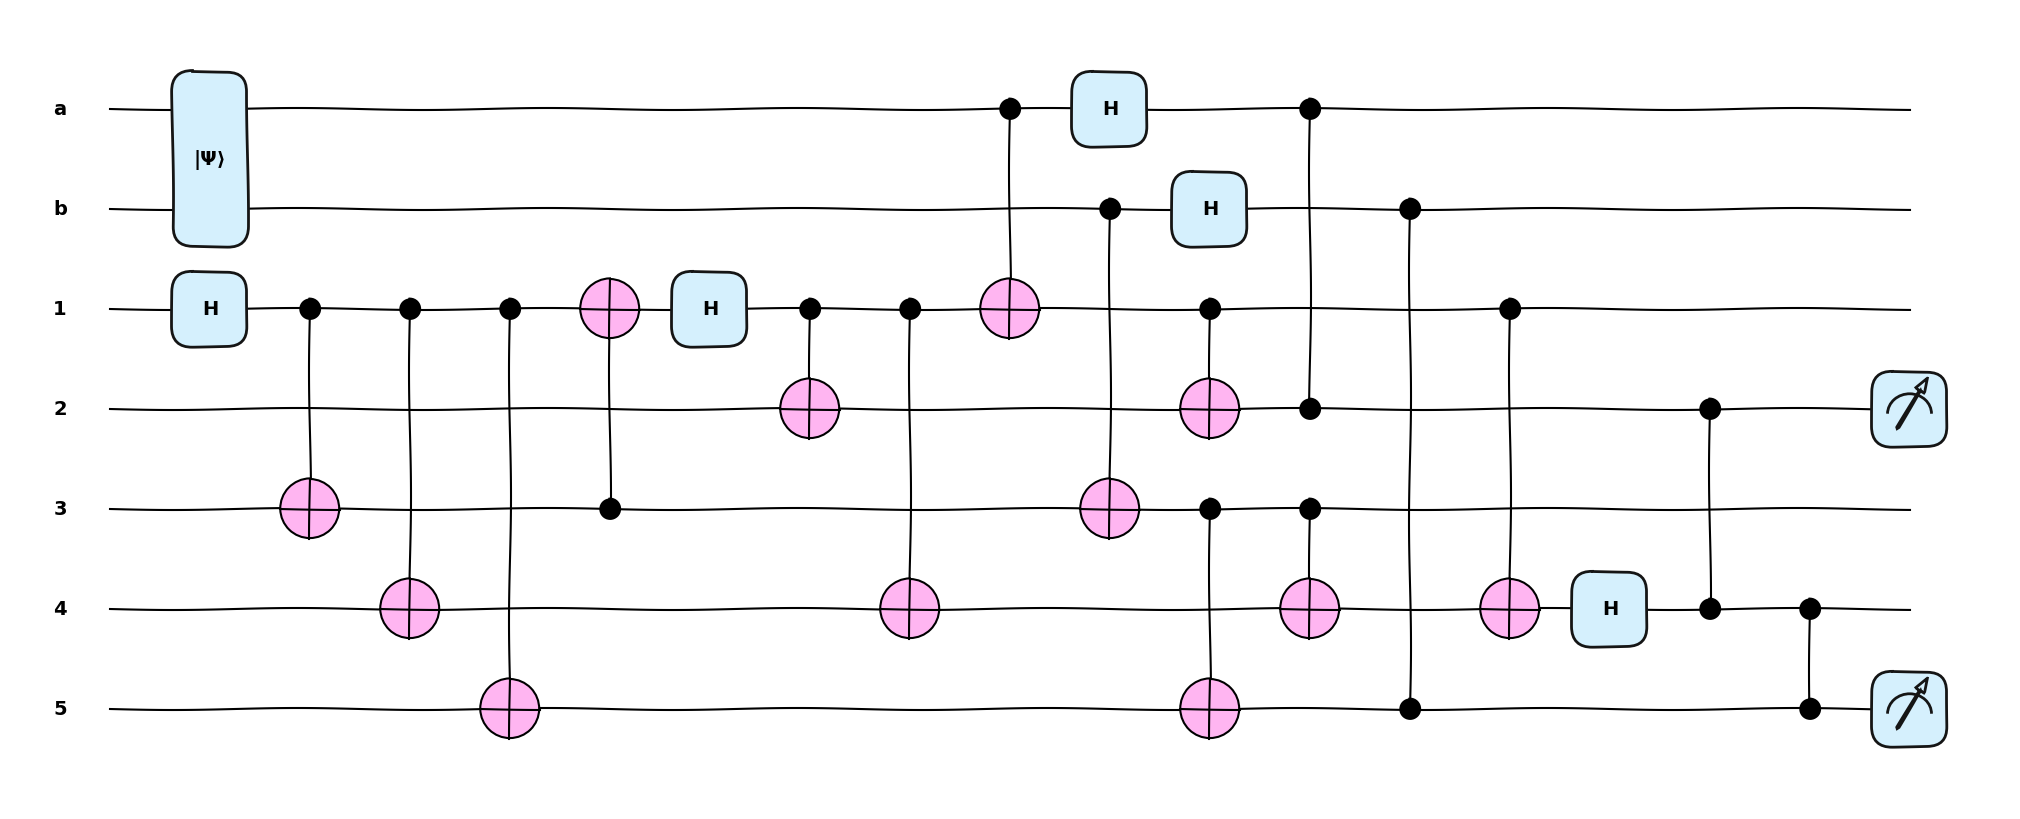

In [ ]:
circuit = qml.QNode(teleportation_2_qubits, dev)
qml.draw_mpl(circuit,style="pennylane")(psi_12)

**Probability calculation**

In [ ]:
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def quantum_teleportation_circuit():
    # Teleportation state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])

    # Entangling Alice and Bob
    qml.Hadamard(wires=2)  # first qubit
    qml.CNOT(wires=[2, 3])
    qml.Hadamard(wires=3)  # second qubit
    qml.CNOT(wires=[3, 4])

    # Connect psi to the quantum channel between Alice and Bob
    qml.CNOT(wires=[0, 2])  # first qubit
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[1, 3])  # second qubit
    qml.Hadamard(wires=1)

    # Sending classical bits (teleportation)
    qml.CZ(wires=[0, 4])  # first qubit
    qml.CNOT(wires=[2, 4])

    qml.CZ(wires=[1, 3])  # second qubit
    qml.CNOT(wires=[3, 4])

    return qml.probs(wires=[2, 3])

# Measurement at Bob
results = quantum_teleportation_circuit()
print("Probabilities at Bob's qubits:", results)

# Measurement at Bob's qubits will be used to recover the teleported state
# All the states are equally likely

Probabilities at Bob's qubits: [0.25 0.25 0.25 0.25]


**Quantum Circuit for five qubit cluster state**




(<Figure size 1100x600 with 1 Axes>, <Axes: >)

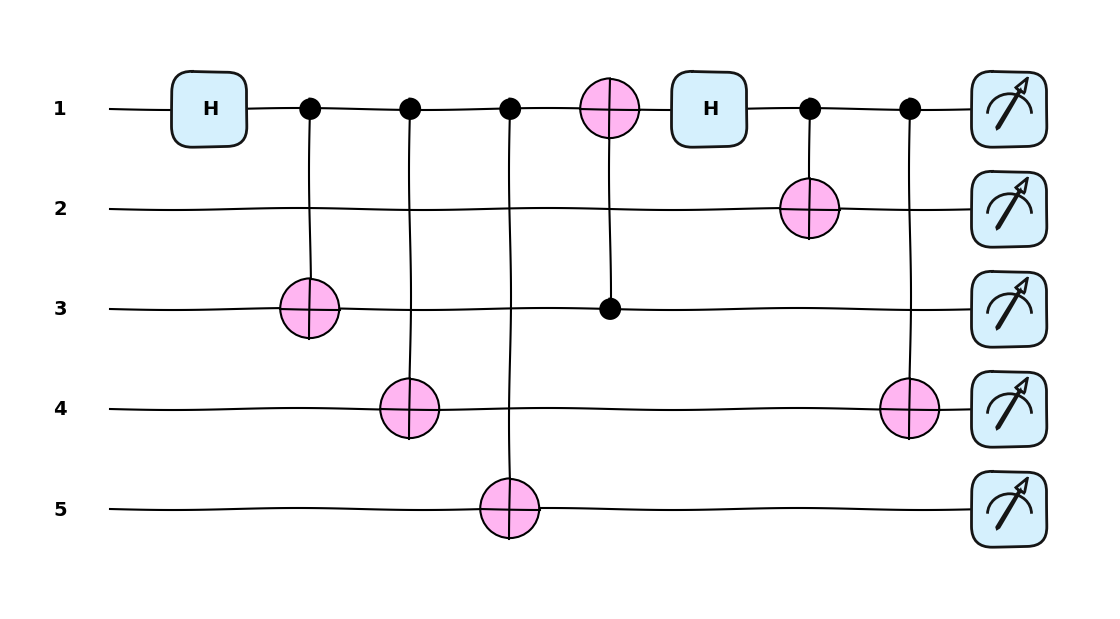

In [ ]:
wires=["1","2","3","4","5"]
dev = qml.device("default.qubit", wires= wires)

def cluster_state(state):
  qml.Hadamard("1")
  qml.CNOT(wires=["1","3"])
  qml.CNOT(wires=["1","4"])
  qml.CNOT(wires=["1","5"])
  qml.CNOT(wires=["3","1"])
  qml.Hadamard("1")
  qml.CNOT(wires=["1","2"])
  qml.CNOT(wires=["1","4"])
  return qml.density_matrix(wires=wires)

circuit=qml.QNode(cluster_state,dev)
qml.draw_mpl(circuit,style="pennylane")(ket_0)


#3 Qubits Teleportation

**Defining the state ψ**

Here Ψ is a 3 qubit state

In [ ]:
# Toy Example
ket_000=np.array([1,0,0,0,0,0,0,0])
ket_001=np.array([0,1,0,0,0,0,0,0])
ket_010=np.array([0,0,1,0,0,0,0,0])
ket_011=np.array([0,0,0,1,0,0,0,0])
ket_100=np.array([0,0,0,0,1,0,0,0])
ket_101=np.array([0,0,0,0,0,1,0,0])
ket_110=np.array([0,0,0,0,0,0,1,0])
ket_111=np.array([0,0,0,0,0,0,0,1])

psi_123=0.5*(ket_000 + ket_001 - ket_010 - ket_011)
psi_123=np.transpose(psi_123)

**Code**

In [ ]:
wires=["a","b","c","1","2","3","4","5","6","7"]
dev = qml.device("default.qubit", wires= wires)
def state_preparation(state):
  qml.StatePrep(state, wires=["a","b","c"])
@qml.qnode(dev)

def teleportation_3_qubits(state):
  state_preparation(state)
  qml.Hadamard("1")
  qml.Hadamard("2")
  qml.Hadamard("3")
  qml.Hadamard("4")
  qml.Hadamard("5")
  qml.Hadamard("6")
  qml.Hadamard("7")
  qml.CZ(wires=["1","2"])
  qml.CZ(wires=["2","3"])
  qml.CZ(wires=["3","4"])
  qml.CZ(wires=["4","5"])
  qml.CZ(wires=["5","6"])
  qml.CZ(wires=["6","7"])
  qml.Hadamard("1")
  qml.Hadamard("3")
  qml.Hadamard("5")
  qml.Hadamard("7")
  qml.CNOT(wires=["a","1"])
  qml.Hadamard("a")
  qml.CNOT(wires=["b","3"])
  qml.Hadamard("b")
  qml.CNOT(wires=["c","5"])
  qml.Hadamard("c")
  qml.CNOT(wires=["1","2"])
  qml.CNOT(wires=["1","4"])
  qml.CNOT(wires=["1","6"])
  qml.CNOT(wires=["1","7"])
  qml.CNOT(wires=["3","4"])
  qml.CNOT(wires=["3","6"])
  qml.CNOT(wires=["3","7"])
  qml.CNOT(wires=["5","6"])
  qml.CNOT(wires=["5","7"])
  qml.CZ(wires=["c","4"])
  qml.CZ(wires=["c","6"])
  qml.CZ(wires=["b","2"])
  qml.CZ(wires=["b","4"])
  qml.CZ(wires=["a","2"])
  qml.Hadamard("7")
  qml.CZ(wires=["6","7"])
  qml.CNOT(wires=["4","6"])
  qml.CNOT(wires=["2","4"])
  return qml.density_matrix(wires=["2","4","6"])

print("\n **********   Original density matrix at Alice :   **********\n")
print(qml.math.dm_from_state_vector(psi_123))
print("\n **********   Density matrix after teleportation at Bob  :   ********** \n")
print(teleportation_3_qubits(psi_123))


 **********   Original density matrix at Alice :   **********

[[ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [-0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [-0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]]

 **********   Density matrix after teleportation at Bob  :   ********** 

[[ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j
   0.  +0.j]
 [-0.25+0.

**Circuit Visualisation**

(<Figure size 2500x1100 with 1 Axes>, <Axes: >)

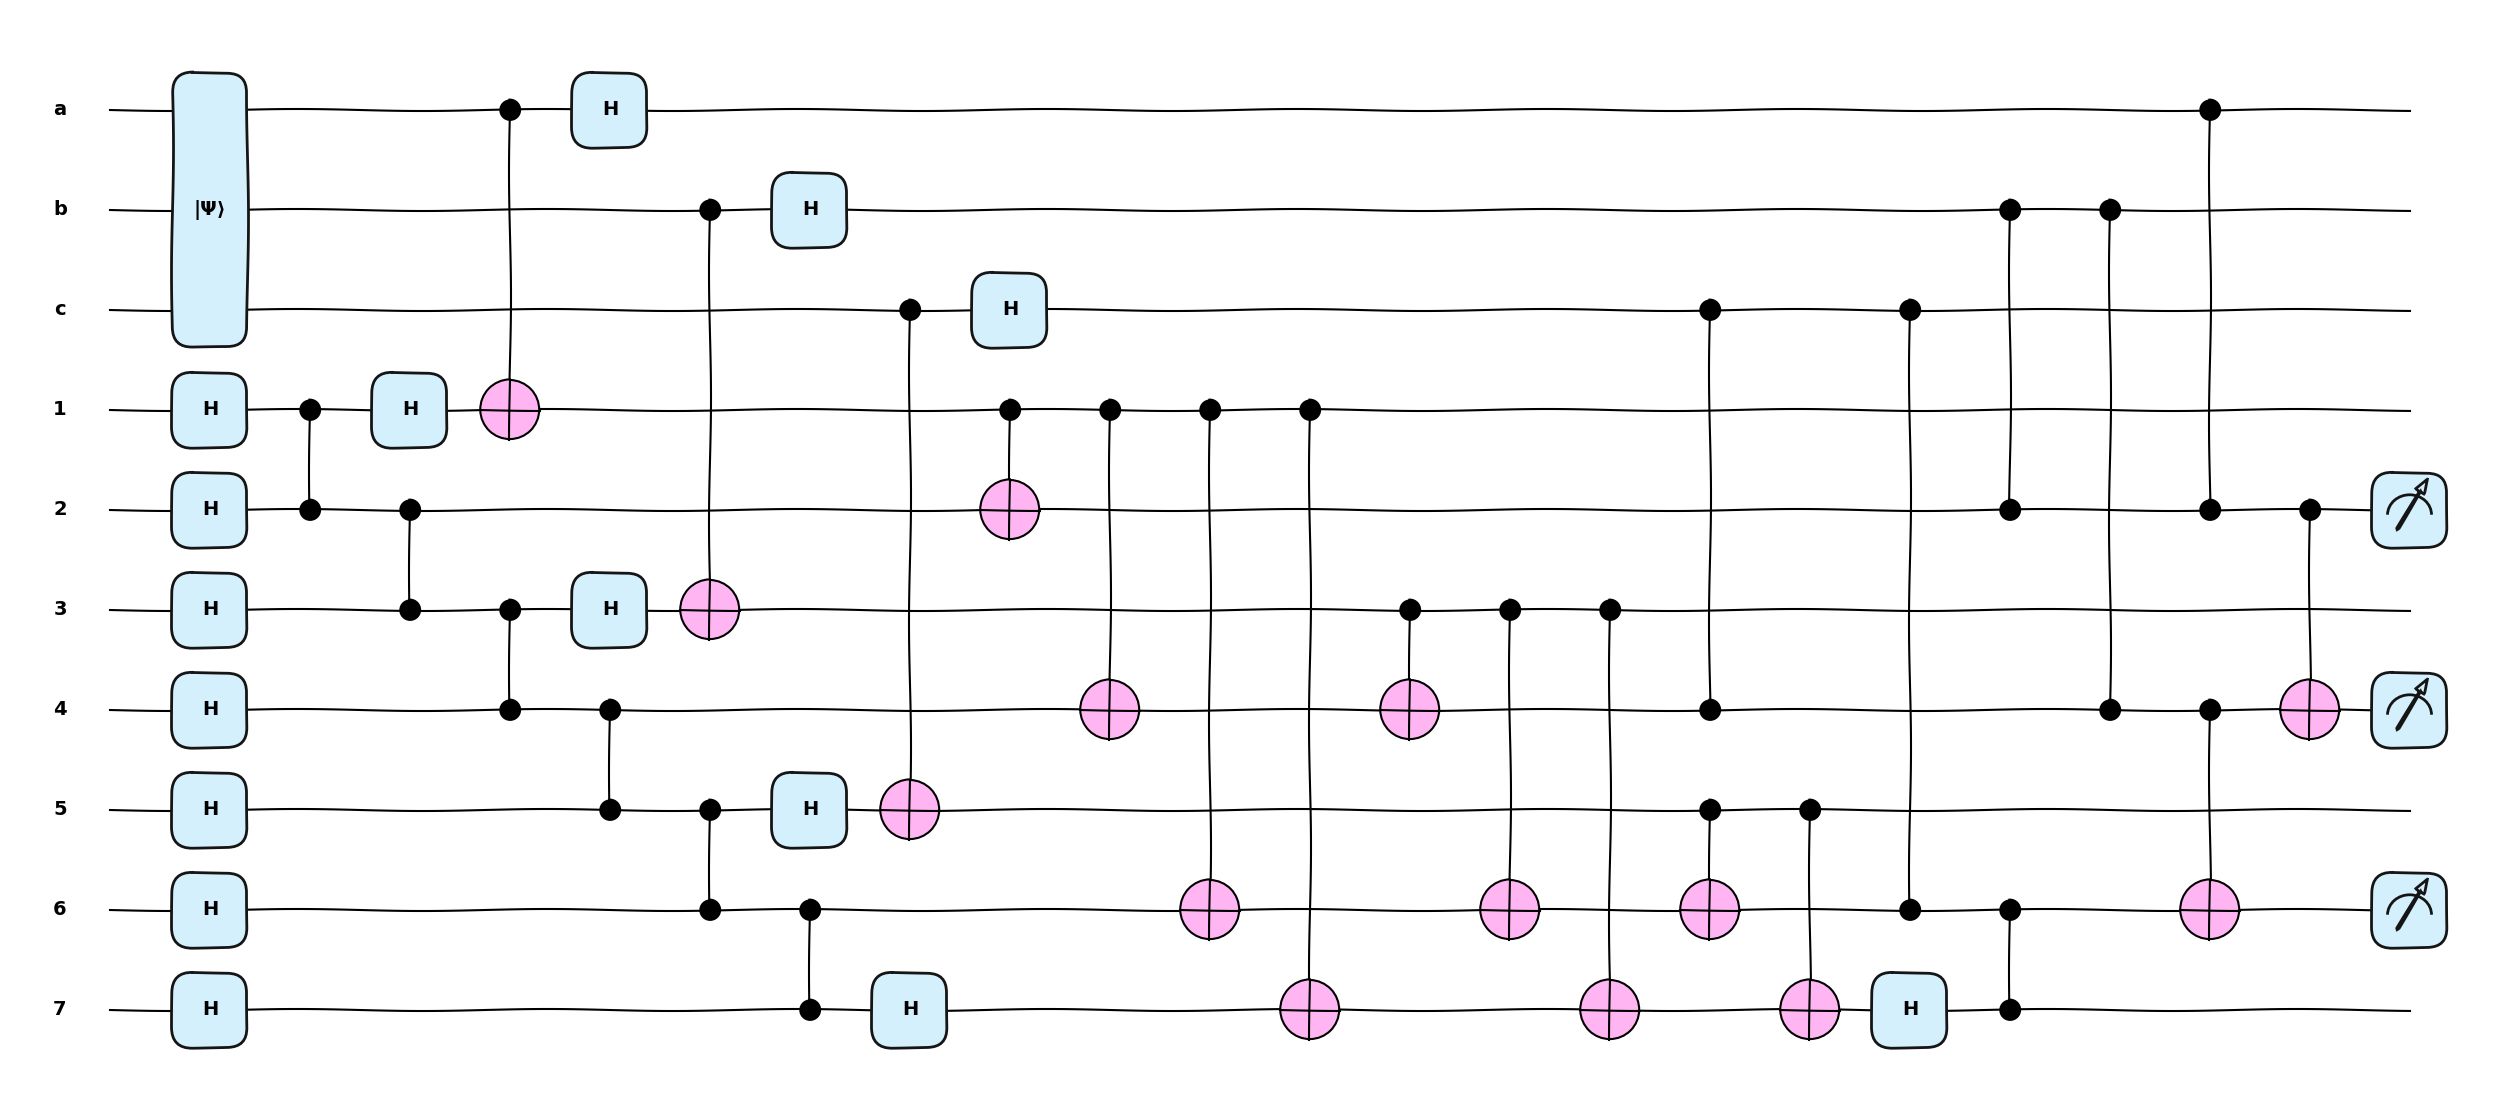

In [ ]:
circuit=qml.QNode(teleportation_3_qubits,dev)
qml.draw_mpl(circuit,style="pennylane")(psi_123)

**Quantum Circuit for seven qubits Cluster State**



****

(<Figure size 1100x800 with 1 Axes>, <Axes: >)

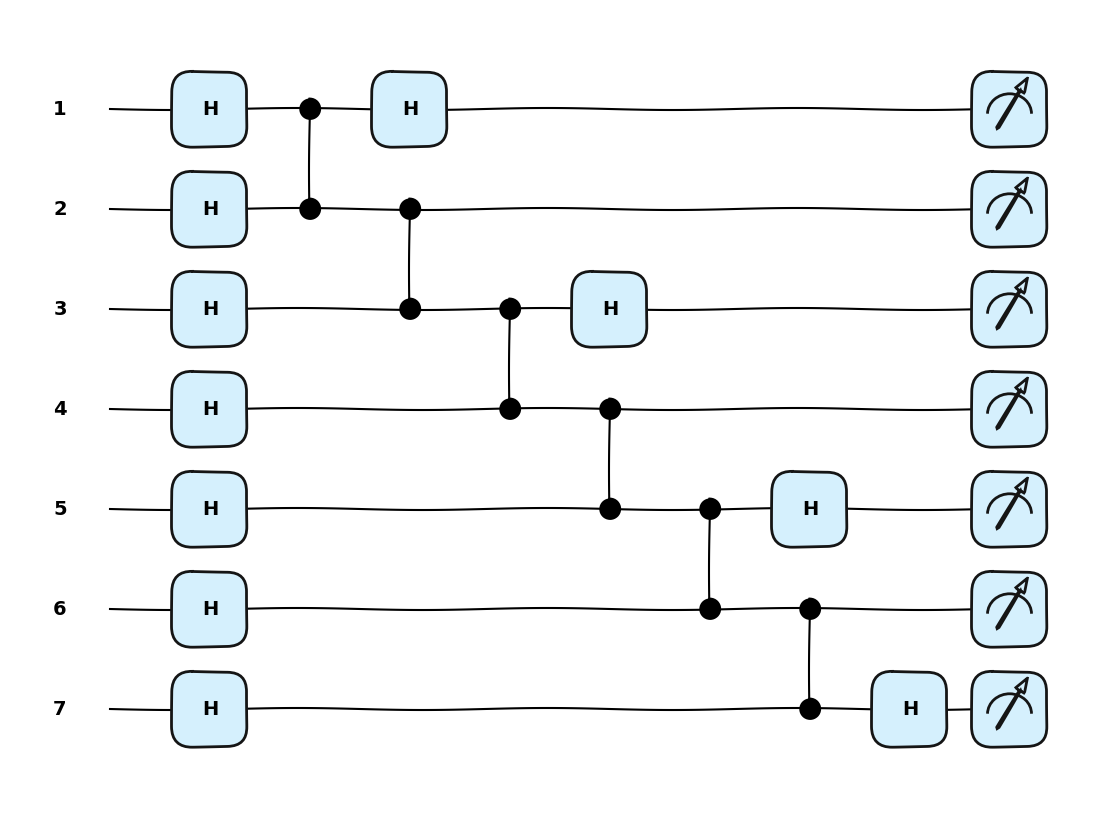

In [ ]:
wires=["1","2","3","4","5","6","7"]
dev = qml.device("default.qubit", wires= wires)

def cluster_state(state):
  qml.Hadamard("1")
  qml.Hadamard("2")
  qml.Hadamard("3")
  qml.Hadamard("4")
  qml.Hadamard("5")
  qml.Hadamard("6")
  qml.Hadamard("7")
  qml.CZ(wires=["1","2"])
  qml.Hadamard("1")
  qml.CZ(wires=["2","3"])
  qml.CZ(wires=["3","4"])
  qml.Hadamard("3")
  qml.CZ(wires=["4","5"])
  qml.CZ(wires=["5","6"])
  qml.Hadamard("5")
  qml.CZ(wires=["6","7"])
  qml.Hadamard("7")
  return qml.density_matrix(wires=wires)
circuit=qml.QNode(cluster_state,dev)
qml.draw_mpl(circuit,style="pennylane")(ket_0)

#Summary



We demonstrated quantum teleportation for a single qubit state, two qubits state and three qubits state.

For a single qubit state teleportation, we used the fundamental circuit involving entanglement.

For two qubits and three qubits state teleportation, we used Cluster States which are highly entangled quantum states.



#References

1.   https://pennylane.ai/qml/demos/tutorial_teleportation/
2.   https://doi.org/10.1038/s41598-020-70446-8



